# Differential Equations
### Philip Antonopoulos, August 2021

> Differential equations are very important for all areas of science because they relate rates of change, which is common place in nature. For an equation to be of the differential kind it has to relate a derivative of a function with another mathematical expression. The problem is that some are solvable analytically, with pen and paper whilst others can't be solved in this fashion. That is why numerical methods, estimating their solutions, come in handy and make the process of solving them very easy.

#### First Order Differential Equations 
 They are differential equations that relate mathematical quantities only with their first deriavative. <br>
 **Example:** 
> Solve the differential equation $ \frac{d}{dx} f(x) = g(x) $

To solve this equatio we have to replace the derivative with its definition:<br>
$ \lim _{a \to 0} \frac{f(x+a)-f(x-a)}{2a} = g(x) $ <br>

<br>
In calculus we consider a as it aproaches infinitely close to 0, but when dealing with computers we have to have discrete space, so we have to consider the limit as a is a very small, but existant, number. Therefore we can eliminate the limit notation.<br>
$\frac{f(x+a)-f(x-a)}{2a} = g(x) \iff f(x+a) = f(x-a) + 2ag(x)$ <br>
<br>
Now we can switch $x = x_0 + a$ : <br>
$f(x_0 + 2a) = f(x_0) + 2ag(x_0 + a)$
<br>

* For us to be able to solve this equation we have to know g and a value f(0)

Substituting different values of x in accordance with the discreteness of our space:
* Let x = 2a then $x_0 = 0$ <br>
f(2a) = f(0) + 2a g(a) {1}
* Let x = 4a then $x_0 = 2a$ <br>
f(4a) = f(2a) + 2a g(3a) which by substitution {1} becomes f(4a) = f(0) + 2ag(a) + 2a g(3a)
* Let x = 6a, similarly :
f(6a) = f(4a) +2a g(5a) 
<br>
Now it is evident that every with every step of 2a there emerges a pattern which can be codified. Specifically: <br>
$f(x) = f(x-2a) + 2ag(x-a) $ but f(x-2a) is the previous term of the sequence. Therefore if we want to write this with a recursive formula: <br>


$ a_n = a_{n-1}+ 2a g(2*n*a -a) $

* **Wrire code to obtain a function that solves the differential equation above, knowing g(x), f(0) and given some points x and a discretiser a.** 

In [7]:
# xs is the list of points at which we want the values of f
def diffeqsolve1(xs, g, f0, a):
    sols = [f0]
    for i in range(1,len(xs)):
        sol_previous = sols[-1] 
        sols.append(sol_previous + 2 * a* g(xs[i] - a))
        
    return sols

* Solve the differential equation if a = $10^{-3}$ a = $ [0,5)$ f(0) = 1 and g(x) = exp(x) 

Text(0.5, 0, 'x')

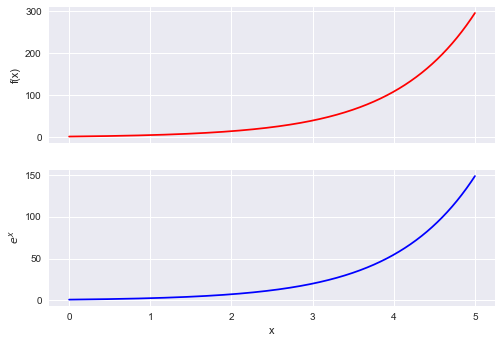

In [14]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')

def g(x): return (np.e)**x

fig , (ax1,ax2) = plt.subplots(nrows = 2, ncols = 1, sharex = True)

xs = np.arange(0.001,5,0.001)

ys = diffeqsolve(xs,g,1,0.001)

ax1.plot(xs,ys,color = 'red')
ax2.plot(xs,g(xs), color = 'blue')
ax1.set_ylabel("f(x)")
ax2.set_ylabel(" $e^x$ ")
ax2.set_xlabel("x")

* Solve the differential equation if a = $10^{-3}$ a = $ [0,5)$ f(0) = -1 and g(x) = sin(x) 

Text(0.5, 0, 'x')

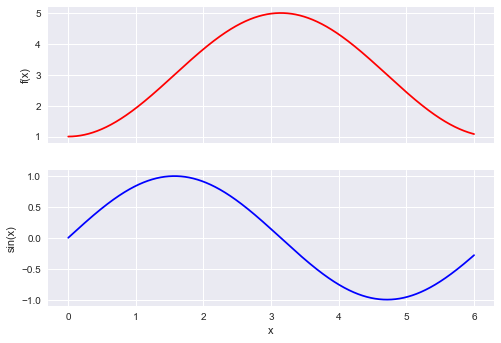

In [18]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')

def g(x): return (np.sin(x))

fig , (ax1,ax2) = plt.subplots(nrows = 2, ncols = 1, sharex = True)

xs = np.arange(0.001,6,0.001)

ys = diffeqsolve(xs,g,1,0.001)

ax1.plot(xs,ys,color = 'red')
ax2.plot(xs,g(xs), color = 'blue')
ax1.set_ylabel("f(x)")
ax2.set_ylabel("sin(x)")
ax2.set_xlabel("x")

Same but for cos(x)

Text(0.5, 0, 'x')

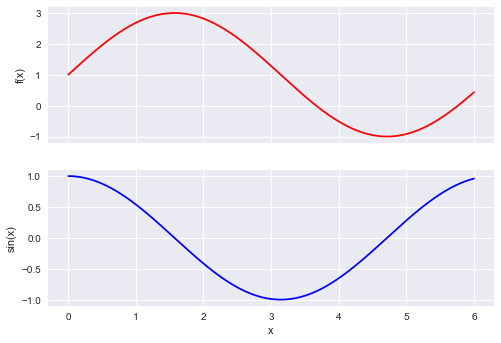

In [21]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')

def g(x): return (np.cos(x))

fig , (ax1,ax2) = plt.subplots(nrows = 2, ncols = 1, sharex = True)

xs = np.arange(0.001,6,0.001)

ys = diffeqsolve(xs,g,1,0.001)

ax1.plot(xs,ys,color = 'red')
ax2.plot(xs,g(xs), color = 'blue')
ax1.set_ylabel("f(x)")
ax2.set_ylabel("sin(x)")
ax2.set_xlabel("x")

#### Second Order Differential Equations
They are differential equations that relate mathematical quantities only with their second derivative. <br>
 **Example:** <br>
 > Solve the differential equation $\frac{d^2}{dt^2}f(t) = h(t) $
 
 To solve this we have to break apart the second derivative as follows: <br>
 $\frac{d}{dt}f(t) = g(t)$ (1) <br>
 Then : <br>
 $\frac{d^2}{dt^2}f(t) = h(t) = \frac{d}{dt}(\frac{d}{dt} f(t)) = h(t)$ <br>
 Substituting (1): <br>
 $\frac{d}{dt}g(t) = h(t)$ (2)
 * To find f(t) we have to solve (1) and (2) as decribed in the solution of first order ODE's. 
 With the previous methods we have that: <br>
 * $ f(t_0 + 2a) = f(t_0) + 2a g(t_0 + a) $ {3}<br>
 * $ g(t_0 + 2a) = g(t_0) + 2a h(t_0 + a) $ {4} <br>
 To solve the problem, knowing h(t), g(0),f(0), and for small a's assuming that g(t0 + a) is g(t0 +2a) we have to solve {4} first by storing all g(t0 + a) and for the same x's but with the previous gvals solving {3}.

* Write a function to solve the ODE knowing h(t).

In [43]:
def difeqsolve2(ts, h, f0, g0, a):
    g = [g0]
    f = [f0]
    for i in range(1,len(ts)):
        g_previous = g[-1]            
        g.append(g_previous + 2 * a * h(ts[i] - a))
        
        f_previous = f[-1]
        #f.append(f_previous + 2 * a * g[i])
        f.append(f_previous + 2 * a * ((g[-1]+g[-2])/2.0))
        
    return g , f

* Test the kinematic equations, assuming constant acceleration, for (x0,v0) = (0,1) and a(t) = 0

Text(0.5, 0, 't')

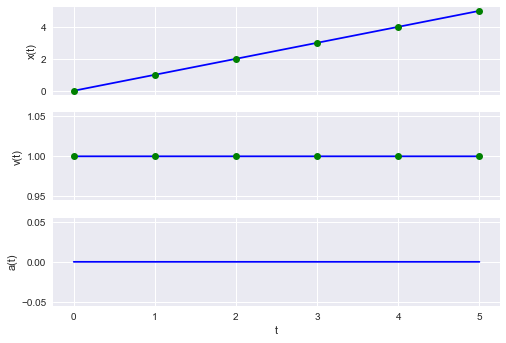

In [48]:
import numpy as np 
import matplotlib.pyplot as plt
plt.style.use('seaborn')
fig , (ax1,ax2,ax3) = plt.subplots(nrows = 3, ncols = 1, sharex = True)
x0 = 0
v0 = 1
td = np.array([0,1,2,3,4,5])
xs = x0 + v0 * td + 0.5*a(td)* (td)**2
vs = v0 + a(td)* td

ts = np.arange(0.001, 5, 0.002)

def a(t): return 0*t
v,x = difeqsolve2(ts, a, 0, 1, 0.001)

ax1.plot(ts, x, color = 'blue')
ax1.plot(td,xs,'go')
ax2.plot(ts, v, color = 'blue')
ax2.plot(td,vs,'go')
ax3.plot(ts, a(ts), color = 'blue')


ax1.set_ylabel("x(t)")
ax2.set_ylabel("v(t)")
ax3.set_ylabel("a(t)")
ax3.set_xlabel("t")

* The same assuming constant acceleration and (x0, v0) = (0,0) a(t)=-9.8

Text(0.5, 0, 't')

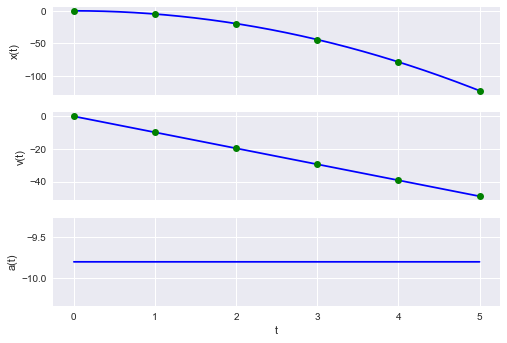

In [51]:
import numpy as np 
import matplotlib.pyplot as plt
plt.style.use('seaborn')
fig , (ax1,ax2,ax3) = plt.subplots(nrows = 3, ncols = 1, sharex = True)
x0 = 0
v0 = 0

td = np.array([0,1,2,3,4,5])
xs = x0 + v0 * td + 0.5*a(td)* (td)**2
vs = v0 + a(td)* td

ts = np.arange(0.001, 5, 0.002)

def a(t): return ((t*0) - 9.8)
v,x = difeqsolve2(ts, a, 0, 0, 0.001)

ax1.plot(ts, x, color = 'blue')
ax1.plot(td,xs,'go')
ax2.plot(ts, v, color = 'blue')
ax2.plot(td,vs,'go')
ax3.plot(ts, a(ts), color = 'blue')


ax1.set_ylabel("x(t)")
ax2.set_ylabel("v(t)")
ax3.set_ylabel("a(t)")
ax3.set_xlabel("t")

* The same but a(t) = t

Text(0.5, 0, 't')

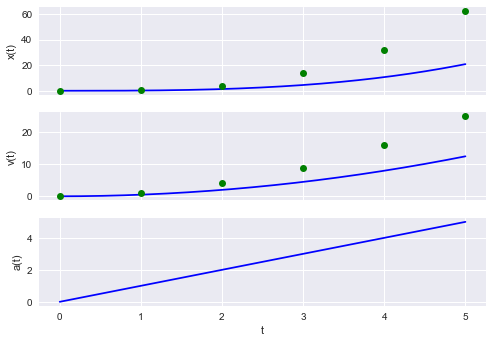

In [53]:
import numpy as np 
import matplotlib.pyplot as plt
plt.style.use('seaborn')
fig , (ax1,ax2,ax3) = plt.subplots(nrows = 3, ncols = 1, sharex = True)
x0 = 0
v0 = 0

td = np.array([0,1,2,3,4,5])
xs = x0 + v0 * td + 0.5*a(td)* (td)**2
vs = v0 + a(td)* td

ts = np.arange(0.001, 5, 0.002)

def a(t): return t
v,x = difeqsolve2(ts, a, 0, 0, 0.001)

ax1.plot(ts, x, color = 'blue')
ax1.plot(td,xs,'go')
ax2.plot(ts, v, color = 'blue')
ax2.plot(td,vs,'go')
ax3.plot(ts, a(ts), color = 'blue')


ax1.set_ylabel("x(t)")
ax2.set_ylabel("v(t)")
ax3.set_ylabel("a(t)")
ax3.set_xlabel("t")